In [1148]:
library(ggplot2)
library(viridis)
library(ggbeeswarm)
library(dplyr)
library(cowplot)

In [1149]:
# load lead variant results sc stages (iPS, mesendo, defendo)
leads.ips = read.csv("/nfs/leia/research/stegle/acuomo/mean/day0/all_expts/leads.csv", row.names = 1)
leads.mes = read.csv("/nfs/leia/research/stegle/acuomo/mean/mesendo_est_June20/leads.csv", row.names = 1)
leads.defendo = read.csv("/nfs/leia/research/stegle/acuomo/mean/defendo_est_June20/leads.csv", row.names = 1)

In [1150]:
leads.ips.sign = leads.ips[leads.ips$global_corr_p_value < 0.1,]
leads.mes.sign = leads.mes[leads.mes$global_corr_p_value < 0.1,]
leads.defendo.sign = leads.defendo[leads.defendo$global_corr_p_value < 0.1,]

In [1151]:
leads.ips.sign$stage = 'ips'
leads.mes.sign$stage = 'mesendo'
leads.defendo.sign$stage = 'defendo'

In [1152]:
cols = c("snp_id","feature","stage","chrom","p_value")

In [1153]:
all_leads = rbind(leads.ips.sign[,cols],
                 leads.mes.sign[,cols],
                 leads.defendo.sign[,cols])

In [1154]:
chrom_22 = all_leads[all_leads$chrom == 22,]
nrow(chrom_22)
length(unique(chrom_22$feature))
eqtls_22 = paste0(chrom_22$feature,"-",chrom_22$snp_id)
length(unique(eqtls_22))

[1] 138

[1] 88

[1] 121

In [1155]:
head(chrom_22,2)

,snp_id,feature,stage,chrom,p_value
34,22_25845855_C_G,ENSG00000100058_CRYBB2P1,ips,22,4.700473e-22
64,22_24295427_C_T,ENSG00000184674_GSTT1,ips,22,3.152693e-26


In [1156]:
sampled_genes_30 = as.character(sample(unique(chrom_22$feature),30))
head(sampled_genes_30)
length(sampled_genes_30)

[1] "ENSG00000099949_LZTR1"  "ENSG00000198355_PIM3"   "ENSG00000100416_TRMU"  
[4] "ENSG00000100162_CENPM"  "ENSG00000183569_SERHL2" "ENSG00000100290_BIK"

[1] 30

In [1157]:
###################################################### 
###################################################### 
###################################################### 

In [1158]:
####################################################################################
#### Uncorrelated (r2<=0.2) highly variable genes (HVGs) as factors / envs (up to 500)
#### computed from logcounts(sce) after regressing out experiment & n_total_reads
#### both y and E (column wise) are quantile normalised

In [1159]:
###################################################### 
##### all cells, all donors (no filtering)

In [1160]:
mydir = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/interaction_test/HVGs/"

In [652]:
# file = paste0(mydir,"500_proxy_hvgs_endo_eqtl/summary_endo_eqtl.csv")
# file = paste0(mydir,"200_proxy_hvgs_endo_eqtl/summary_endo_eqtl.csv")
# file = paste0(mydir,"100_proxy_hvgs_endo_eqtl/summary_endo_eqtl.csv")
# file = paste0(mydir,"50_proxy_hvgs_endo_eqtl/summary_endo_eqtl.csv")
file = paste0(mydir,"20_proxy_hvgs_endo_eqtl/summary_endo_eqtl.csv")
# file = paste0(mydir,"10_proxy_hvgs_endo_eqtl/summary_endo_eqtl.csv")
df = read.csv(file, row.names=1)
nrow(df)
df = df[df$gene %in% chrom_22$feature,]
nrow(df)
head(df,2)

[1] 111

[1] 111

,gene,n_snps,pv_raw,snpID,pv
0,ENSG00000189306_RRP7A,3,0,22_42896474_T_C,0
1,ENSG00000189306_RRP7A,3,0,22_42897414_A_C,0


In [653]:
df = df[order(df$pv, df$pv_raw),]
df = df[-which(duplicated(df$gene)),]
df$qv = p.adjust(df$pv, method = "BH")

In [651]:
hvg10 = c(nrow(df), nrow(df[df$qv<0.01,]),nrow(df[df$qv<0.01,])/nrow(df))
hvg10

[1] 79.0000000 50.0000000  0.6329114

In [654]:
hvg20 = c(nrow(df), nrow(df[df$qv<0.01,]),nrow(df[df$qv<0.01,])/nrow(df))
hvg20

[1] 79.0000000 52.0000000  0.6582278

In [503]:
hvg50 = c(nrow(df), nrow(df[df$qv<0.01,]),nrow(df[df$qv<0.01,])/nrow(df))
hvg50

[1] 79.0000000 53.0000000  0.6708861

In [492]:
hvg100 = c(nrow(df), nrow(df[df$qv<0.01,]),nrow(df[df$qv<0.01,])/nrow(df))
hvg100

[1] 79.0000000 54.0000000  0.6835443

In [470]:
hvg200 = c(nrow(df), nrow(df[df$qv<0.01,]),nrow(df[df$qv<0.01,])/nrow(df))
hvg200

[1] 79.000000 57.000000  0.721519

In [555]:
hvg500 = c(nrow(df), nrow(df[df$qv<0.01,]),nrow(df[df$qv<0.01,])/nrow(df))
hvg500

[1] 78.0000000 57.0000000  0.7307692

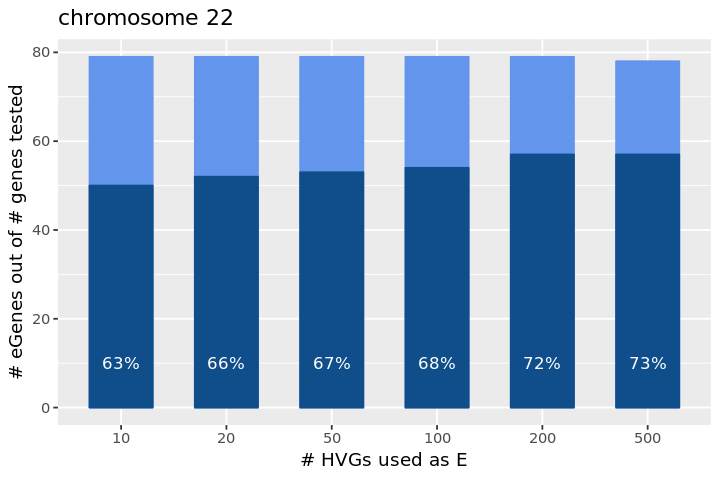

In [655]:
df = data.frame(n_HVGs = c(10,20,50,100,200,500), 
                n_eGenes = c(hvg10[2],hvg20[2],hvg50[2],hvg100[2],hvg200[2],hvg500[2]), 
                n_genes = c(hvg10[1],hvg20[1],hvg50[1],hvg100[1],hvg200[1],hvg500[1]))
options(repr.plot.width = 6, repr.plot.height = 4)
ggplot(df, aes(x = as.factor(n_HVGs), y = n_genes)) + ggtitle("chromosome 22") + 
    geom_bar(stat="identity", width = 0.6, fill = "cornflowerblue", col = "cornflowerblue") + 
    geom_bar(aes(x = as.factor(n_HVGs), y = n_eGenes), stat="identity", width = 0.6, 
             fill = "dodgerblue4", col = "dodgerblue4") + 
    xlab("# HVGs used as E") + ylab("# eGenes out of # genes tested") +
    annotate("text", x=1, y=10, label= paste0(round(hvg10[3], digits=2)*100,"%"), size = 3.5, col = "white") +
    annotate("text", x=2, y=10, label= paste0(round(hvg20[3], digits=2)*100,"%"), size = 3.5, col = "white") +
    annotate("text", x=3, y=10, label= paste0(round(hvg50[3], digits=2)*100,"%"), size = 3.5, col = "white") +
    annotate("text", x=4, y=10, label= paste0(round(hvg100[3],digits=2)*100,"%"), size = 3.5, col = "white") +
    annotate("text", x=5, y=10, label= paste0(round(hvg200[3],digits=2)*100,"%"), size = 3.5, col = "white") +
    annotate("text", x=6, y=10, label= paste0(round(hvg500[3],digits=2)*100,"%"), size = 3.5, col = "white")

In [929]:
### calibration (permuting E from GxE only, i.e. H1)

In [1022]:
prefixes = c("10_proxy_hvgs_endo_eqtl","20_proxy_hvgs_endo_eqtl",
             "50_proxy_hvgs_endo_eqtl","100_proxy_hvgs_endo_eqtl",
             "200_proxy_hvgs_endo_eqtl","500_proxy_hvgs_endo_eqtl")

In [995]:
i = 1
plist = list()
for (prefix in prefixes){
    file0 = paste0(mydir,prefix,"/summary_endo_eqtl.csv")
    df0 = read.csv(file0, row.names=1)
    df0 = df0[df0$gene %in% chrom_22$feature,]
    file1 = paste0(mydir,prefix,"/summary_endo_eqtl_perms.csv")
    df1 = read.csv(file1, row.names=1)
    df1$gene = gsub("_perm0","",df1$gene)
    df1 = df1[df1$gene %in% chrom_22$feature,]
    df = inner_join(df0, df1,by = c("gene","snpID","n_snps"), suffix = c("",".perm"))
    df$pv_uniform = runif(n = nrow(df), min = 0, max = 1)
    p = ggplot(df, aes(x = sort(-log10(pv_uniform)), y = sort(-log10(pv)))) + geom_point(alpha = 0.8, col = "cornflowerblue")
    p = p + geom_point(aes(x = sort(-log10(pv_uniform)), y = sort(-log10(pv.perm))), col = "black", alpha = 0.8)
    p = p + geom_abline(slope = 1)
    plist[[i]] = p + ggtitle(gsub("_endo_eqtl","",prefix)) 
    i = i+1
} 

Warning message:
“Column `gene` joining factor and character vector, coercing into character vector”Warning message:
“Column `gene` joining factor and character vector, coercing into character vector”Warning message:
“Column `gene` joining factor and character vector, coercing into character vector”Warning message:
“Column `snpID` joining factors with different levels, coercing to character vector”Warning message:
“Column `gene` joining factor and character vector, coercing into character vector”Warning message:
“Column `snpID` joining factors with different levels, coercing to character vector”Warning message:
“Column `gene` joining factor and character vector, coercing into character vector”Warning message:
“Column `snpID` joining factors with different levels, coercing to character vector”Warning message:
“Column `gene` joining factor and character vector, coercing into character vector”Warning message:
“Column `snpID` joining factors with different levels, coercing to character vec

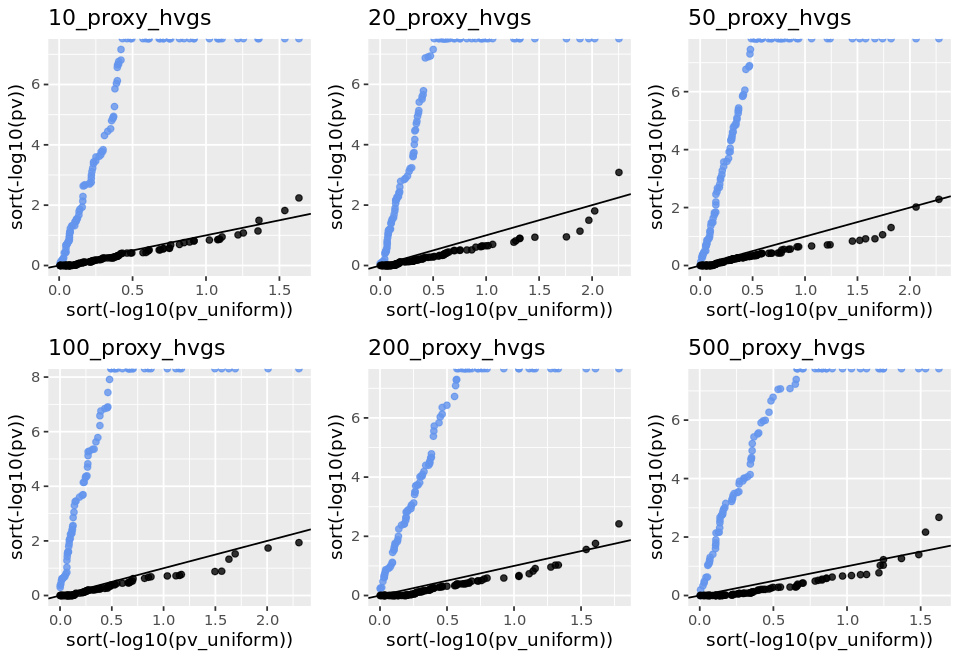

In [996]:
options(repr.plot.width = 8, repr.plot.height = 5.5)
plot_grid(plist[[1]],plist[[2]],plist[[3]],plist[[4]],plist[[5]],plist[[6]],ncol = 3)

In [997]:
# calibration permuting G (GxE, H1)

In [1023]:
prefixes

[1] "10_proxy_hvgs_endo_eqtl"  "20_proxy_hvgs_endo_eqtl" 
[3] "50_proxy_hvgs_endo_eqtl"  "100_proxy_hvgs_endo_eqtl"
[5] "200_proxy_hvgs_endo_eqtl" "500_proxy_hvgs_endo_eqtl"

In [1024]:
i = 1
plist = list()
for (prefix in prefixes){
  file0 = paste0(mydir,prefix,"/summary_endo_eqtl.csv")
    df0 = read.csv(file0, row.names=1)
    df0 = df0[df0$gene %in% chrom_22$feature,]
    file1 = paste0(mydir,prefix,"_permuteG/summary_endo_eqtl_perms.csv")
    df1 = read.csv(file1, row.names=1)
    df1$gene = gsub("_perm0","",df1$gene)
    df1 = df1[df1$gene %in% chrom_22$feature,]
    df = inner_join(df0, df1,by = c("gene","snpID","n_snps"), suffix = c("",".perm"))
    df$pv_uniform = runif(n = nrow(df), min = 0, max = 1)
    p = ggplot(df, aes(x = sort(-log10(pv_uniform)), y = sort(-log10(pv)))) + geom_point(alpha = 0.8, col = "cornflowerblue")
    p = p + geom_point(aes(x = sort(-log10(pv_uniform)), y = sort(-log10(pv.perm))), col = "forestgreen", alpha = 0.8)
    p = p + geom_abline(slope = 1)
    plist[[i]] = p + ggtitle(gsub("_endo_eqtl","",prefix)) 
    i = i+1
} 

Warning message:
“Column `gene` joining factor and character vector, coercing into character vector”Warning message:
“Column `snpID` joining factors with different levels, coercing to character vector”Warning message:
“Column `gene` joining factor and character vector, coercing into character vector”Warning message:
“Column `gene` joining factor and character vector, coercing into character vector”Warning message:
“Column `gene` joining factor and character vector, coercing into character vector”Warning message:
“Column `gene` joining factor and character vector, coercing into character vector”Warning message:
“Column `snpID` joining factors with different levels, coercing to character vector”Warning message:
“Column `gene` joining factor and character vector, coercing into character vector”Warning message:
“Column `snpID` joining factors with different levels, coercing to character vector”

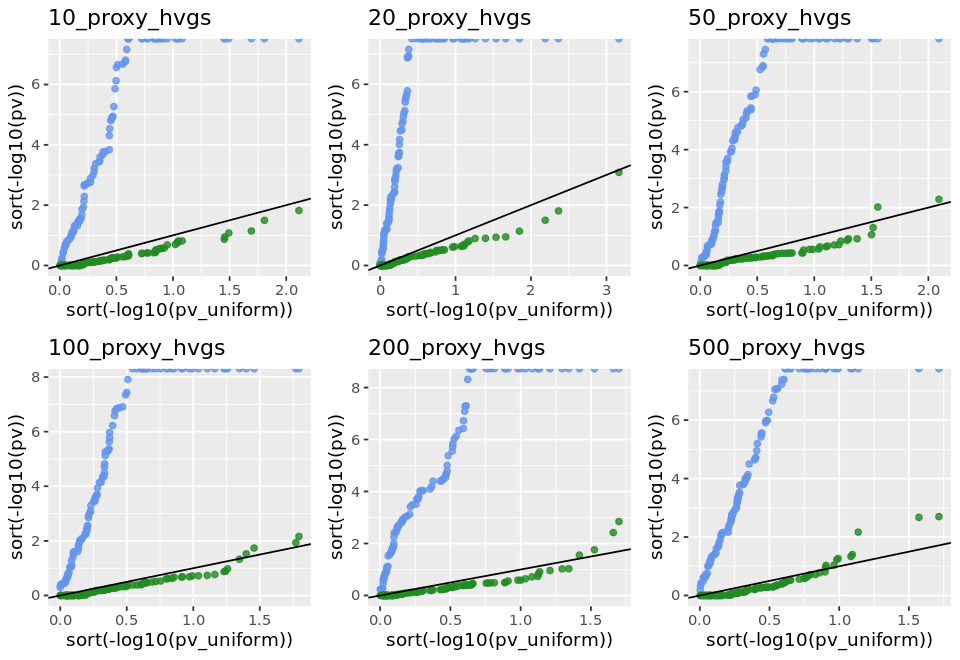

In [1025]:
options(repr.plot.width = 8, repr.plot.height = 5.5)
plot_grid(plist[[1]],plist[[2]],plist[[3]],
          plist[[4]],plist[[5]],plist[[6]],ncol = 3)

In [1014]:
### comparison between results (scatterplot)

In [1015]:
length(prefixes)
prefixes

[1] 6

[1] "10_proxy_hvgs_endo_eqtl"  "20_proxy_hvgs_endo_eqtl" 
[3] "50_proxy_hvgs_endo_eqtl"  "100_proxy_hvgs_endo_eqtl"
[5] "200_proxy_hvgs_endo_eqtl" "500_proxy_hvgs_endo_eqtl"

In [1016]:
k = 1
plist = list()
labs = gsub("_proxy_hvgs_endo_eqtl","",prefixes)
for (i in 1:(length(prefixes)-1)){
    prefix = prefixes[i]
    file0 = paste0(mydir,prefix,"/summary_endo_eqtl.csv")
    df0 = read.csv(file0, row.names=1)
    df0 = df0[df0$gene %in% chrom_22$feature,]
    for (j in (i+1):length(prefixes)){
        file1 = paste0(mydir,prefixes[j],"/summary_endo_eqtl.csv")
        df1 = read.csv(file1, row.names=1)
        df1 = df1[df1$gene %in% chrom_22$feature,] 
        df = inner_join(df0, df1,by = c("gene","snpID","n_snps"))
        p = ggplot(df, aes(x = -log10(pv.x), y = -log10(pv.y)))
        p = p + geom_point(alpha = 0.8, col = "firebrick") 
        p = p + geom_abline(slope = 1, col = "firebrick")
        plist[[k]] = p + ggtitle(paste0(labs[i],"vs",labs[j], ", R=", 
                                        round(cor(df$pv.x, df$pv.y), digits = 2))) 
        k = k+1
    }
} 

Warning message:
“Column `gene` joining factors with different levels, coercing to character vector”Warning message:
“Column `snpID` joining factors with different levels, coercing to character vector”Warning message:
“Column `gene` joining factors with different levels, coercing to character vector”Warning message:
“Column `snpID` joining factors with different levels, coercing to character vector”Warning message:
“Column `gene` joining factors with different levels, coercing to character vector”Warning message:
“Column `snpID` joining factors with different levels, coercing to character vector”Warning message:
“Column `gene` joining factors with different levels, coercing to character vector”Warning message:
“Column `snpID` joining factors with different levels, coercing to character vector”Warning message:
“Column `gene` joining factors with different levels, coercing to character vector”Warning message:
“Column `snpID` joining factors with different levels, coercing to character ve

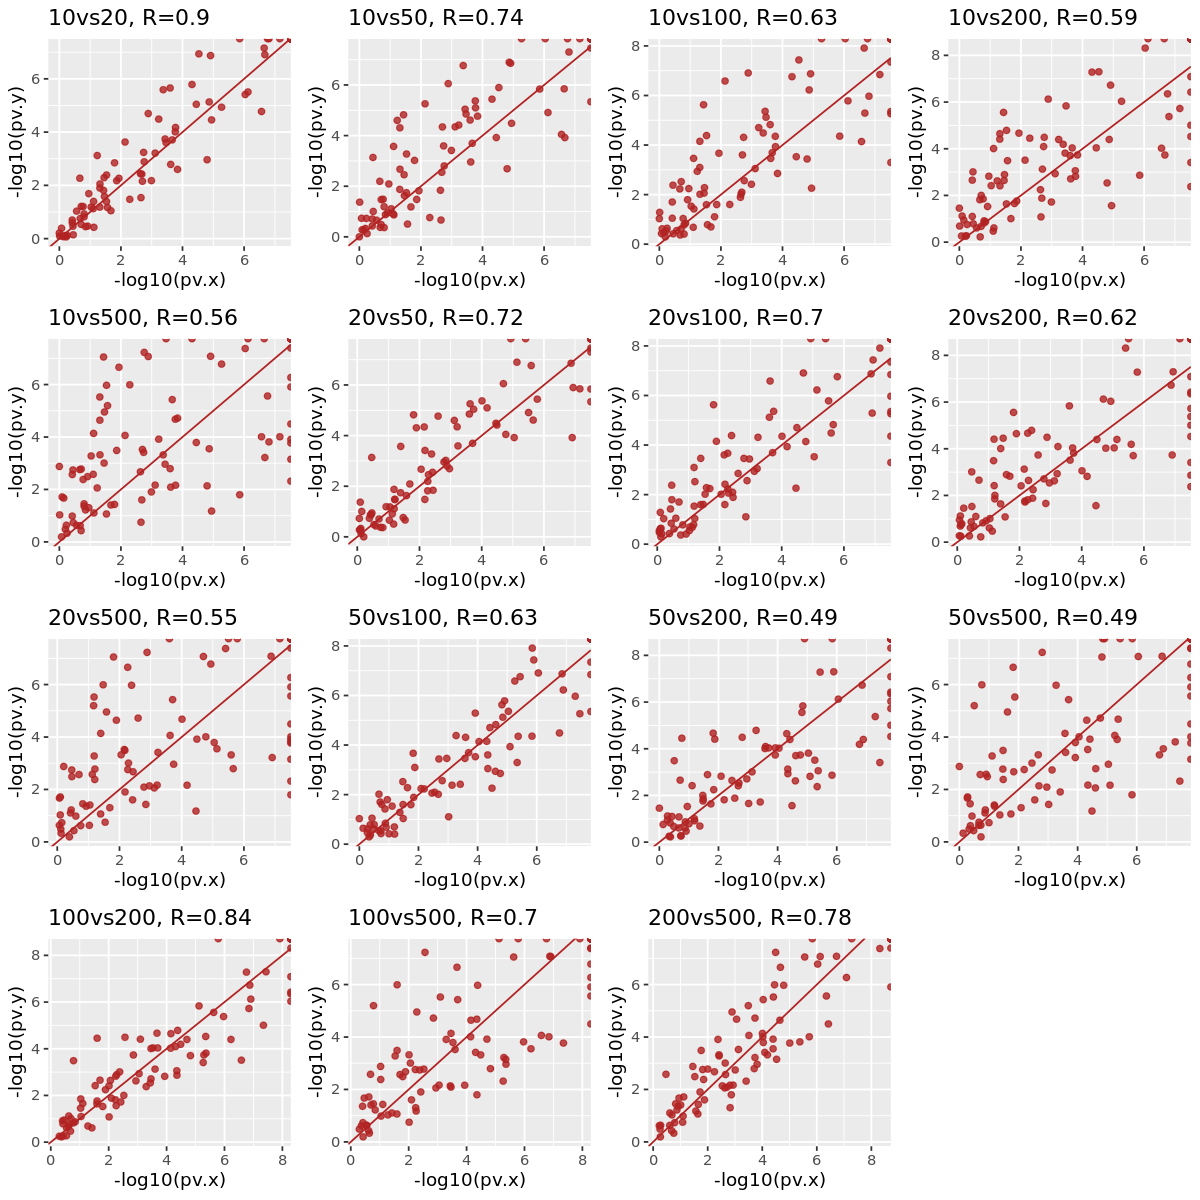

In [1017]:
options(repr.plot.width = 10, repr.plot.height = 10)
plot_grid(plist[[1]],plist[[2]],plist[[3]],plist[[4]],plist[[5]],plist[[6]],
          plist[[7]],plist[[8]],plist[[9]],plist[[10]],plist[[11]],plist[[12]],
          plist[[13]],plist[[14]],plist[[15]],ncol = 4)

In [1161]:
##### bootstrap (80% cells) 100 times
## 10, 20, 50, 100, 200, 500 HVGs

In [1173]:
prefixes = c("10_proxy_hvgs_endo_eqtl_bootstrap","20_proxy_hvgs_endo_eqtl_bootstrap",
             "50_proxy_hvgs_endo_eqtl_bootstrap","100_proxy_hvgs_endo_eqtl_bootstrap",
             "200_proxy_hvgs_endo_eqtl_bootstrap","500_proxy_hvgs_endo_eqtl_bootstrap")

In [1174]:
i = 1
plist = list()
for (prefix in prefixes){
    file0 = paste0(mydir,prefix,"/summary_endo_eqtl.csv")
    df0 = read.csv(file0, row.names = 1)
    # 100% for comparison
    file1 = paste0(mydir,gsub("_bootstrap","",prefix),"/summary_endo_eqtl.csv")
    df1 = read.csv(file1, row.names = 1)
    df1 = df1[order(df1$pv, df1$pv_raw),]
    df1 = df1[-which(duplicated(df1$gene)),]
    df1$qv = p.adjust(df1$pv, method = "BH")
    df = inner_join(df0,df1[,c("gene","snpID","qv")])
    df_to_plot = df[df$gene %in% sampled_genes_30,]
    p = ggplot(df_to_plot, aes(x = as.factor(gsub(".*_","",gene)), y = -log10(pv+1e-10), colour = -log10(qv+1e-10))) 
    p = p + geom_violin(alpha = 0.5) + geom_boxplot(width=0.1) + geom_quasirandom(alpha = 0.4, size = 0.5) 
    p = p + theme(axis.text.x = element_text(angle = 90, hjust = 1, size = 8)) 
    p = p + scale_color_viridis(option = "D", name="-log10(q value)")
    p = p + xlab("30 randomly sampled chromsome 22 genes") + ylab("-log10(P)")
    plist[[i]] = p + ggtitle(gsub("_endo_eqtl_bootstrap","",prefix))
    i = i+1
}

Joining, by = c("gene", "snpID")
Joining, by = c("gene", "snpID")
Joining, by = c("gene", "snpID")
Joining, by = c("gene", "snpID")
Joining, by = c("gene", "snpID")
Warning message:
“Column `gene` joining factors with different levels, coercing to character vector”Warning message:
“Column `snpID` joining factors with different levels, coercing to character vector”Joining, by = c("gene", "snpID")
Warning message:
“Column `gene` joining factors with different levels, coercing to character vector”Warning message:
“Column `snpID` joining factors with different levels, coercing to character vector”

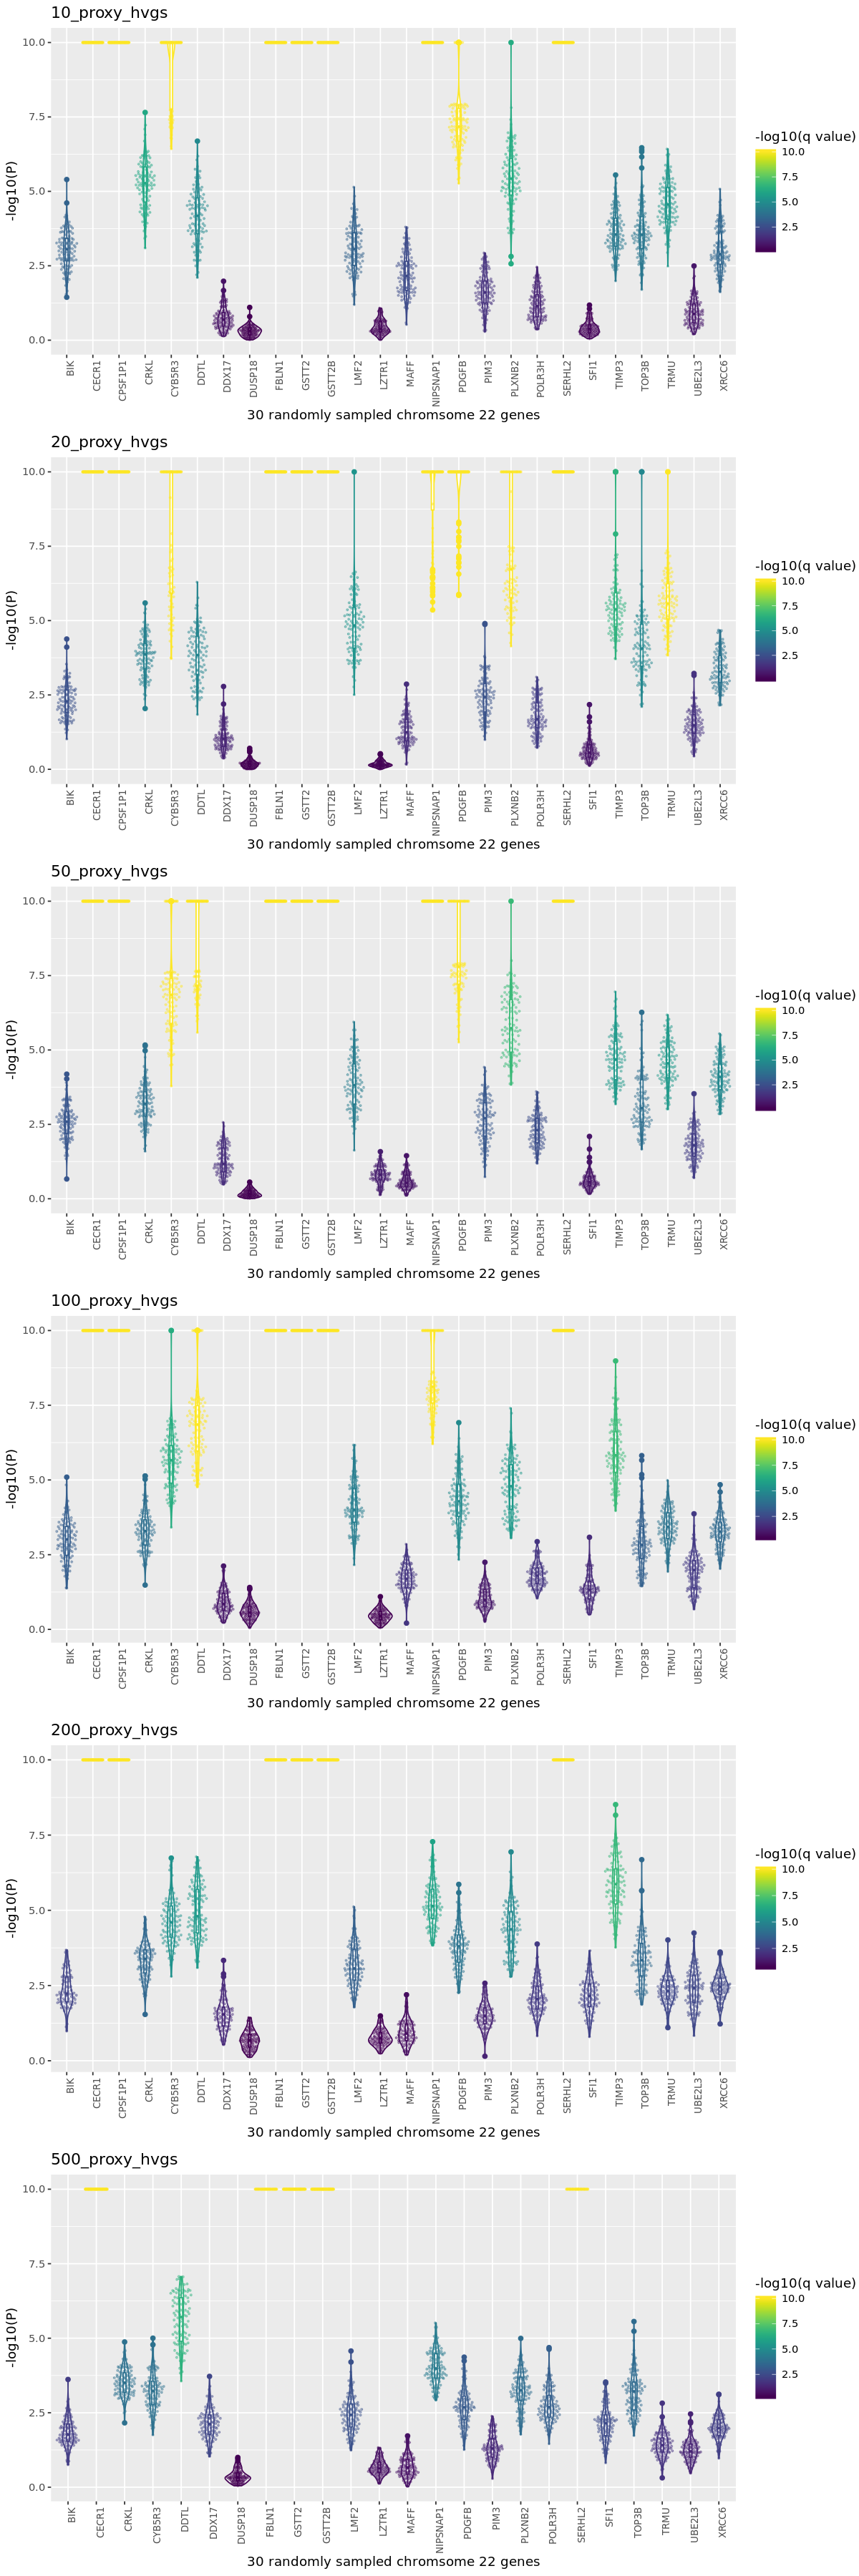

In [1175]:
options(repr.plot.width = 10, repr.plot.height = 30)
plot_grid(plist[[1]],plist[[2]],plist[[3]],
          plist[[4]],plist[[5]],plist[[6]],ncol = 1)